In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [72]:
df = pd.read_csv("./melb_data.csv")
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


In [73]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [74]:
df.shape

(13580, 21)

In [75]:
correlation = df[['Suburb', 'Postcode']].apply(lambda x: pd.factorize(x)[0]).corr()
correlation

,Suburb,Postcode
Suburb,1.000000,0.894455
Postcode,0.894455,1.000000


In [76]:
df1 = df.drop(['Address', 'Method', 'SellerG', 'Date', 'Lattitude', 'Longtitude', 'Regionname', 'Postcode', 'CouncilArea'], axis=1)
df1.head()

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,Abbotsford,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,4019.0
1,Abbotsford,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0
2,Abbotsford,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0
3,Abbotsford,3,h,850000.0,2.5,3.0,2.0,1.0,94.0,NaN,NaN,4019.0
4,Abbotsford,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0


In [77]:
df1.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,7454.417378
std,0.955748,6.393107e+05,5.868725,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,4378.581772
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,249.000000
25%,2.000000,6.500000e+05,6.100000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,4380.000000
50%,3.000000,9.030000e+05,9.200000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,6555.000000
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,10331.000000
max,10.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,21650.000000


In [78]:
df1["Suburb"].nunique()

314

In [79]:
df1.groupby("Type")["Type"].agg('count')
#h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse

Type
h    9449
t    1114
u    3017
Name: Type, dtype: int64

# Data Cleaning

## Handle NA values

In [80]:
df1.isna().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Propertycount       0
dtype: int64

In [81]:
df1["BuildingArea"].fillna(df1["BuildingArea"].mean(), inplace=True)
df1["YearBuilt"].fillna(df1["YearBuilt"].median(), inplace=True)
df1.isna().sum()

Suburb            0
Rooms             0
Type              0
Price             0
Distance          0
Bedroom2          0
Bathroom          0
Car              62
Landsize          0
BuildingArea      0
YearBuilt         0
Propertycount     0
dtype: int64

In [82]:
df1.dropna(inplace=True)
df1.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Propertycount    0
dtype: int64

## Convert data types

In [83]:
df1["Bathroom"].unique()

array([1., 2., 3., 4., 0., 7., 5., 6., 8.])

In [84]:
df1["Bedroom2"] = df1["Bedroom2"].astype(int)
df1["Bathroom"] = df1["Bathroom"].astype(int)
df1["Car"] = df1["Car"].astype(int)
df1.head()

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,Abbotsford,2,h,1480000.0,2.5,2,1,1,202.0,151.96765,1970.0,4019.0
1,Abbotsford,2,h,1035000.0,2.5,2,1,0,156.0,79.00000,1900.0,4019.0
2,Abbotsford,3,h,1465000.0,2.5,3,2,0,134.0,150.00000,1900.0,4019.0
3,Abbotsford,3,h,850000.0,2.5,3,2,1,94.0,151.96765,1970.0,4019.0
4,Abbotsford,4,h,1600000.0,2.5,3,1,2,120.0,142.00000,2014.0,4019.0


In [85]:
df1[df1["Landsize"] == 0].shape[0]

1939

In [86]:
df1 = df1[df1['Landsize'] != 0]
df1.shape

(11579, 12)

In [87]:
df1[df1["BuildingArea"] == 0].shape[0]

17

In [88]:
df1 = df1[df1['BuildingArea'] != 0]
df1.shape

(11562, 12)

In [89]:
df1 = df1[df1['Bedroom2'] != 0]
df1.shape

(11550, 12)

In [90]:
df1["YearBuilt"].unique()

array([1970., 1900., 2014., 1910., 1890., 2005., 1880., 1985., 2013.,
       2012., 1920., 1950., 1998., 1930., 2016., 2009., 1980., 2011.,
       2015., 1975., 1993., 1960., 2003., 1995., 2010., 1996., 1925.,
       2004., 2008., 1962., 1955., 1988., 1953., 1997., 1990., 1965.,
       2007., 1967., 2000., 1889., 1888., 1934., 1935., 1938., 1887.,
       1904., 1978., 1939., 1940., 2006., 1945., 1947., 1958., 2017.,
       1999., 1992., 1961., 1928., 1977., 1976., 2001., 1948., 1927.,
       1981., 1943., 1974., 1957., 1986., 1926., 2002., 1994., 1966.,
       1949., 1905., 1912., 1924., 1991., 1942., 1973., 1972., 1969.,
       1915., 2018., 1916., 1982., 1971., 1963., 1897., 1919., 1923.,
       1983., 1903., 1830., 1937., 1908., 1913., 1917., 1885., 1902.,
       1854., 1850., 1898., 1941., 1951., 1946., 1989., 1956., 1968.,
       1984., 1901., 1987., 1959., 1979., 1933., 1886., 1929., 1906.,
       1870., 1932., 1875., 1863., 1918., 1893., 1856., 1860., 1894.,
       1914., 1868.,

In [91]:
df1[df1["Bedroom2"] == 20]

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
7404,Caulfield East,3,h,1650000.0,9.3,20,1,2,875.0,151.96765,1970.0,608.0


In [92]:
len(df1.Suburb.unique())

312

In [93]:
df1.Suburb = df1.Suburb.apply(lambda x: x.strip())

suburb_count = df1.groupby('Suburb')['Suburb'].agg('count').sort_values(ascending=False)
suburb_count

Suburb
Reservoir             336
Bentleigh East        237
Preston               230
Richmond              195
Brunswick             186
                     ... 
Beaconsfield Upper      1
Hurstbridge             1
Healesville             1
Plumpton                1
Croydon South           1
Name: Suburb, Length: 312, dtype: int64

In [94]:
suburb_count_less_than_10 = suburb_count[suburb_count <= 10]
len(suburb_count_less_than_10)

111

In [95]:
len(df1.Suburb.unique())

312

In [96]:
df1.Suburb = df1.Suburb.apply(lambda x: 'other' if x in suburb_count_less_than_10 else x)
len(df1.Suburb.unique())

202

In [97]:
df1["price_per_m2"] = df1["Price"]/df1["Landsize"]
df1

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,price_per_m2
0,Abbotsford,2,h,1480000.0,2.5,2,1,1,202.0,151.96765,1970.0,4019.0,7326.732673
1,Abbotsford,2,h,1035000.0,2.5,2,1,0,156.0,79.00000,1900.0,4019.0,6634.615385
2,Abbotsford,3,h,1465000.0,2.5,3,2,0,134.0,150.00000,1900.0,4019.0,10932.835821
3,Abbotsford,3,h,850000.0,2.5,3,2,1,94.0,151.96765,1970.0,4019.0,9042.553191
4,Abbotsford,4,h,1600000.0,2.5,3,1,2,120.0,142.00000,2014.0,4019.0,13333.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,16.7,4,2,2,652.0,151.96765,1981.0,7392.0,1909.509202
13576,Williamstown,3,h,1031000.0,6.8,3,2,2,333.0,133.00000,1995.0,6380.0,3096.096096
13577,Williamstown,3,h,1170000.0,6.8,3,2,4,436.0,151.96765,1997.0,6380.0,2683.486239
13578,Williamstown,4,h,2500000.0,6.8,4,1,5,866.0,157.00000,1920.0,6380.0,2886.836028


In [98]:
df1[df1.Suburb=='Airport West']

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,price_per_m2
38,Airport West,3,t,840000.0,13.5,3,2,1,303.0,225.00000,2016.0,3464.0,2772.277228
41,Airport West,2,h,603000.0,13.5,2,1,1,272.0,84.00000,1950.0,3464.0,2216.911765
42,Airport West,3,t,700000.0,13.5,3,2,2,239.0,134.00000,2009.0,3464.0,2928.870293
43,Airport West,3,h,600000.0,13.5,2,1,1,290.0,116.00000,1980.0,3464.0,2068.965517
44,Airport West,2,u,500000.0,13.5,2,1,1,168.0,86.00000,2011.0,3464.0,2976.190476
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12429,Airport West,3,h,1064000.0,10.4,3,1,1,767.0,151.96765,1970.0,3464.0,1387.222947
13088,Airport West,3,h,860000.0,10.4,3,2,2,593.0,151.96765,1970.0,3464.0,1450.252951
13089,Airport West,3,h,850000.0,10.4,3,1,2,551.0,96.00000,1950.0,3464.0,1542.649728
13334,Airport West,3,h,975500.0,10.4,3,1,1,697.0,151.96765,1970.0,3464.0,1399.569584


In [99]:
df1["m2_per_room"] = df1["Landsize"]/df1["Rooms"]
df1.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,price_per_m2,m2_per_room
count,11550.000000,1.155000e+04,11550.000000,11550.000000,11550.000000,11550.000000,11550.000000,11550.000000,11550.000000,11550.000000,11550.000000,11550.000000
mean,3.101385,1.146422e+06,10.788294,3.077576,1.585801,1.691948,651.857403,158.478736,1965.433680,7321.248918,3346.505915,235.425337
std,0.895060,6.480368e+05,5.935857,0.906318,0.707350,0.992305,4318.365658,423.932391,29.634283,4404.372217,10094.167691,1483.826027
min,1.000000,1.310000e+05,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1196.000000,249.000000,6.235364,0.333333
25%,3.000000,7.123750e+05,6.900000,3.000000,1.000000,1.000000,272.000000,132.000000,1960.000000,4019.000000,1385.638503,95.000000
50%,3.000000,9.700000e+05,10.300000,3.000000,1.000000,2.000000,534.000000,151.967650,1970.000000,6482.000000,2359.462781,152.000000
75%,4.000000,1.400000e+06,13.500000,4.000000,2.000000,2.000000,676.000000,151.967650,1970.000000,9758.000000,3943.550895,208.000000
max,10.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,21650.000000,710000.000000,144338.000000


In [100]:
df2 = df1[~(df1["m2_per_room"]<=25)]
df2.shape

(11506, 14)

In [101]:
df2.price_per_m2.describe()

count    11506.000000
mean      3088.935890
std       2550.400928
min          6.235364
25%       1383.710271
50%       2350.583073
75%       3913.043478
max      24404.761905
Name: price_per_m2, dtype: float64

## Remove outliers of price_per_m2 beyond one standard deviation of the mean

In [102]:
def remove_outliers_ppm2(df):
    new_df = pd.DataFrame()
    for key, sdf in df.groupby('Suburb'):
        mean = sdf.price_per_m2.mean()
        std = sdf.price_per_m2.std()
        new_sdf = sdf[(sdf.price_per_m2 >= (mean-std)) & (sdf.price_per_m2 <= (mean+std))]
        new_df = pd.concat([new_df, new_sdf], ignore_index=True)
    return new_df

In [103]:
df3 = remove_outliers_ppm2(df2)
df3.shape

(8995, 14)

In [104]:
def scatter_plot_ppm2(df, suburb):
    sdf = df[df['Suburb'] == suburb]
    b2 = sdf[sdf['Bedroom2'] == 2] 
    b3 = sdf[sdf['Bedroom2'] == 3]
             
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(b2['Landsize'], b2['price_per_m2'], color="red", label='2 bedroom', s=50) 
    plt.scatter(b3['Landsize'], b3['price_per_m2'], color="blue", label='3 bedroom', s=50)
    
    plt.legend()
    plt.xlabel("Landsize")
    plt.ylabel("Price per m2")
    plt.title(suburb)


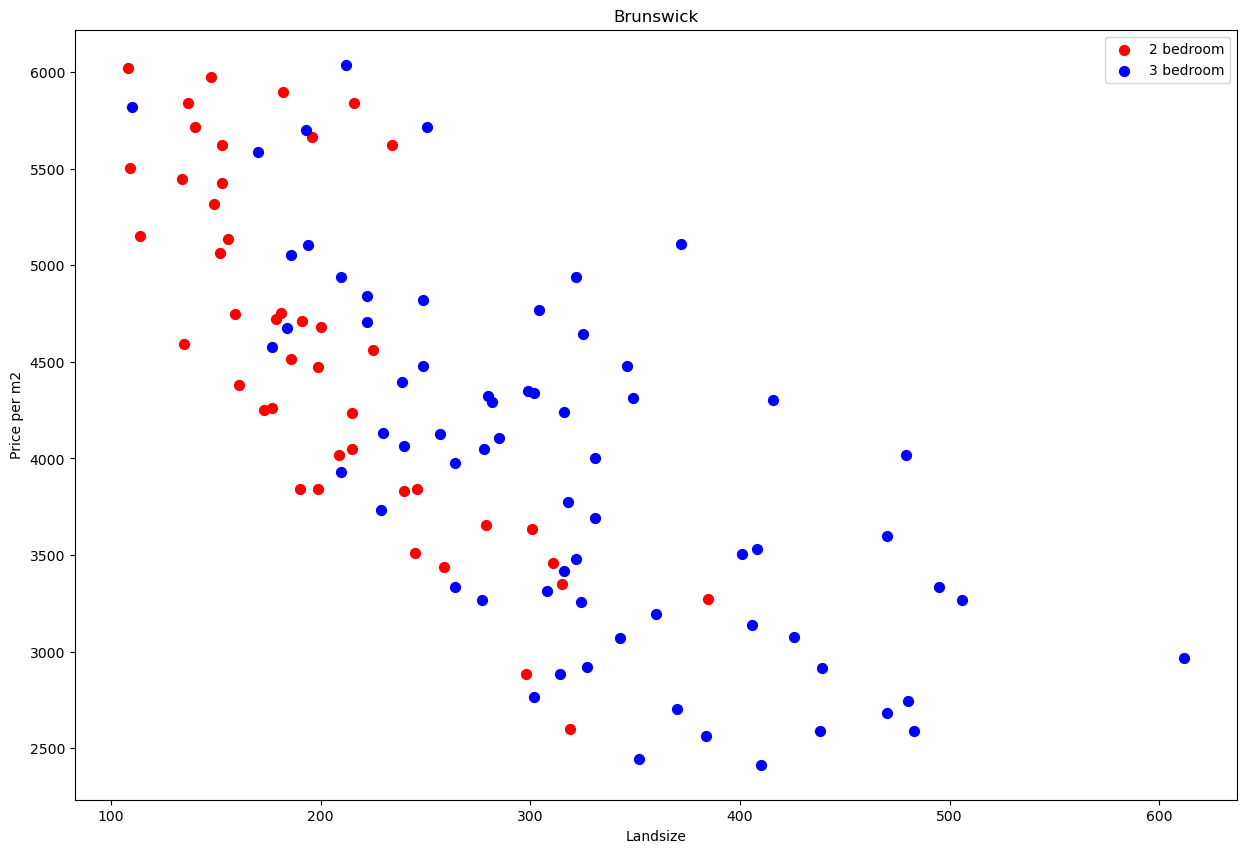

In [105]:
scatter_plot_ppm2(df3, 'Brunswick')

In [106]:
def scatter_plot_price(df, suburb):
    sdf = df[df['Suburb'] == suburb]
    b2 = sdf[sdf['Bedroom2'] == 2] 
    b3 = sdf[sdf['Bedroom2'] == 3]
             
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(b2['Landsize'], b2['Price'], color="red", label='2 bedroom', s=50) 
    plt.scatter(b3['Landsize'], b3['Price'], color="blue", label='3 bedroom', s=50)
    
    plt.legend()
    plt.xlabel("Landsize")
    plt.ylabel("Price")
    plt.title(suburb)

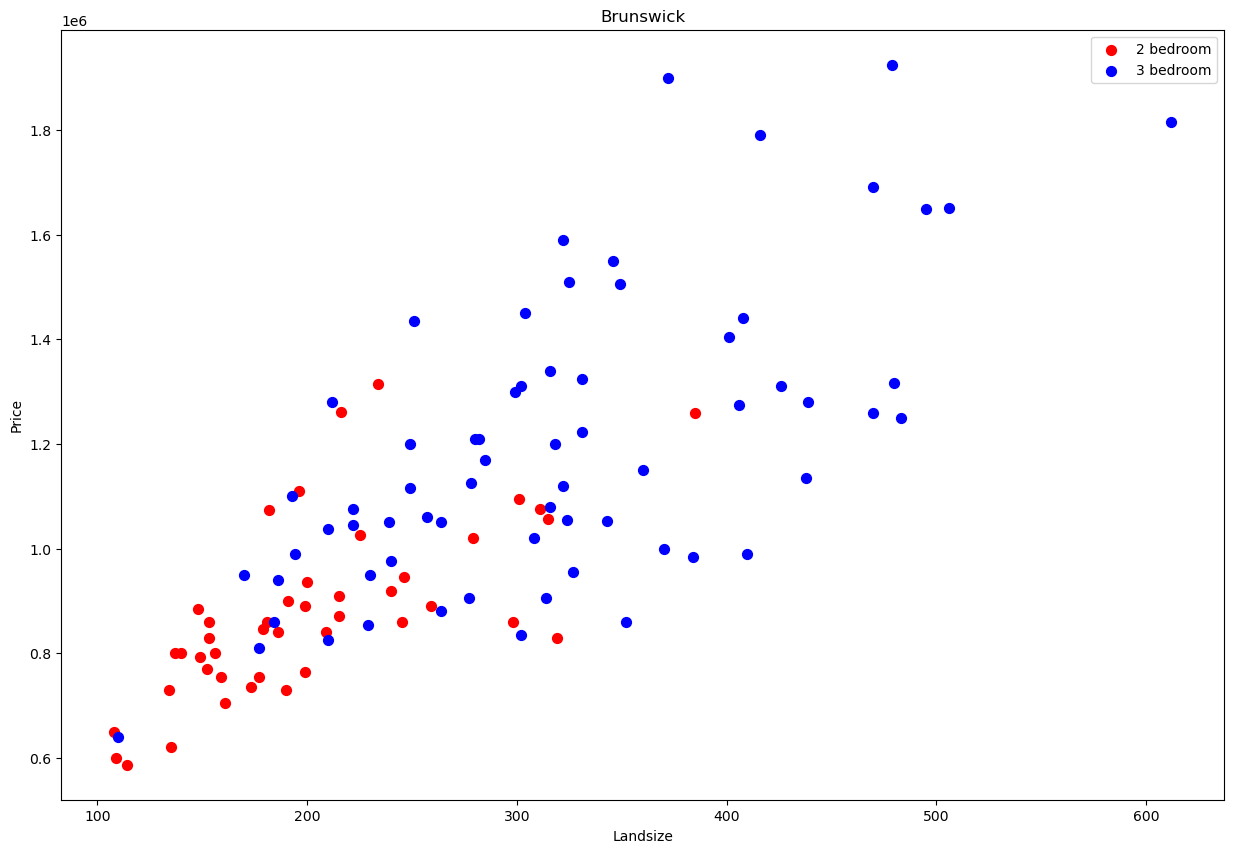

In [107]:
scatter_plot_price(df3, "Brunswick")

Text(0, 0.5, 'Count')

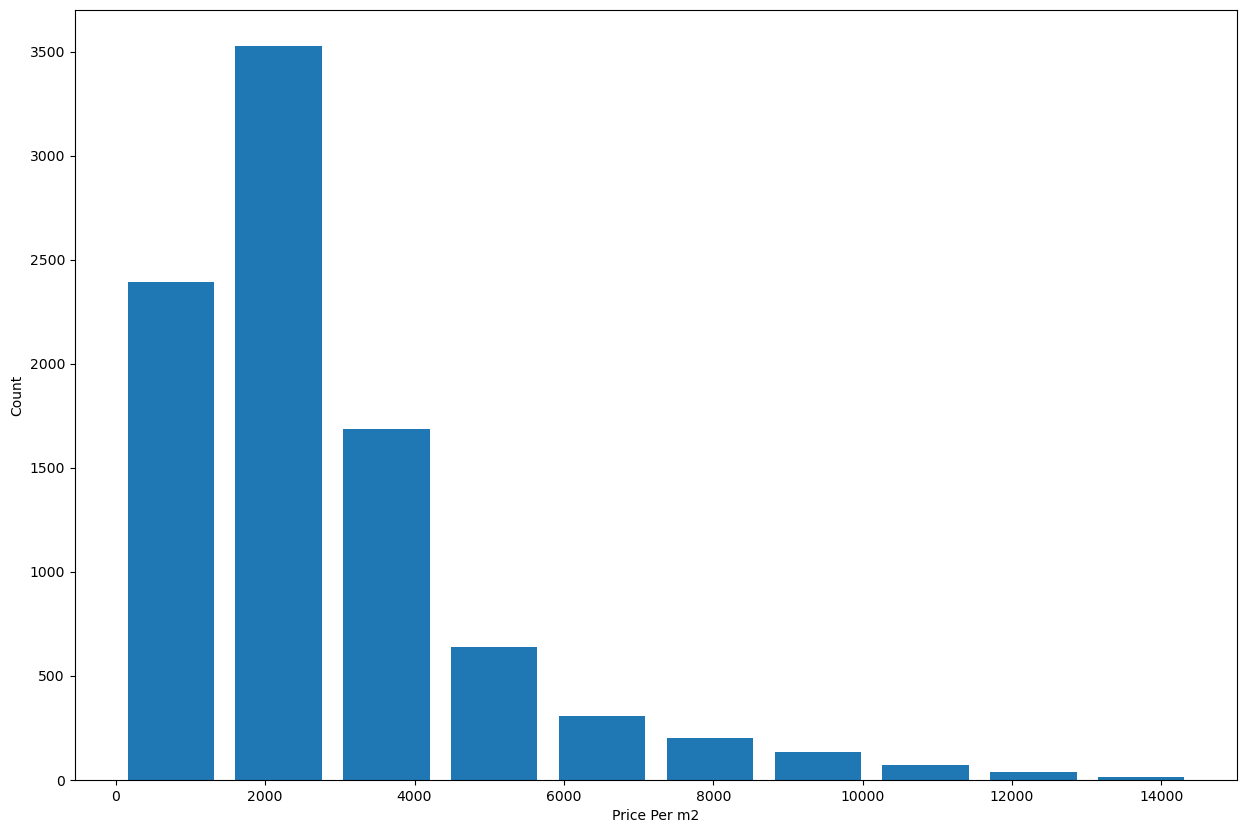

In [108]:
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.hist(df3.price_per_m2, rwidth=0.8)
plt.xlabel("Price Per m2")
plt.ylabel("Count")

In [109]:
df3.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,price_per_m2,m2_per_room
count,8995.000000,8.995000e+03,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.00000,8995.000000,8995.000000
mean,3.216231,1.193388e+06,11.140356,3.189661,1.590550,1.761534,561.403335,163.533200,1962.964869,7277.39055,2814.294869,181.346872
std,0.856792,6.403155e+05,6.019336,0.874772,0.708049,1.011579,1161.459670,477.998391,27.726320,4426.19009,2046.241505,362.870850
min,1.000000,1.310000e+05,0.700000,1.000000,0.000000,0.000000,64.000000,1.000000,1850.000000,249.00000,14.276316,30.250000
25%,3.000000,7.600000e+05,7.400000,3.000000,1.000000,1.000000,327.000000,140.000000,1955.000000,3873.00000,1407.090660,110.666667
50%,3.000000,1.018000e+06,10.500000,3.000000,1.000000,2.000000,555.000000,151.967650,1970.000000,6380.00000,2243.243243,158.000000
75%,4.000000,1.446000e+06,13.800000,4.000000,2.000000,2.000000,671.000000,151.967650,1970.000000,9704.00000,3477.755475,203.500000
max,8.000000,8.000000e+06,48.100000,20.000000,8.000000,10.000000,76000.000000,44515.000000,2018.000000,21650.00000,14453.125000,25333.333333


In [110]:
df3 = df3[~(df3.Bedroom2 > 10)]
df3.shape

(8994, 14)

In [111]:
df3 = df3[~(df3.BuildingArea < 10)]
df3.shape

(8972, 14)

In [112]:
df3 = df3[~(df3.Bedroom2 > 6)]

In [113]:
df3.head()

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,price_per_m2,m2_per_room
0,Abbotsford,2,h,1480000.0,2.5,2,1,1,202.0,151.96765,1970.0,4019.0,7326.732673,101.000000
1,Abbotsford,2,h,1035000.0,2.5,2,1,0,156.0,79.00000,1900.0,4019.0,6634.615385,78.000000
2,Abbotsford,3,h,850000.0,2.5,3,2,1,94.0,151.96765,1970.0,4019.0,9042.553191,31.333333
3,Abbotsford,2,h,941000.0,2.5,2,1,0,181.0,151.96765,1970.0,4019.0,5198.895028,90.500000
4,Abbotsford,3,h,1876000.0,2.5,4,2,0,245.0,210.00000,1910.0,4019.0,7657.142857,81.666667


In [114]:
df3 = df3[~(df3.Landsize > 1000)]
df3.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,price_per_m2,m2_per_room
count,8687.000000,8.687000e+03,8687.000000,8687.000000,8687.000000,8687.000000,8687.000000,8687.000000,8687.000000,8687.000000,8687.000000,8687.000000
mean,3.206976,1.178583e+06,11.083757,3.176816,1.576494,1.749856,505.486474,158.295122,1962.788535,7279.465523,2859.973505,160.810142
std,0.826530,6.057639e+05,5.836163,0.821119,0.686949,0.996392,207.791783,98.755985,27.767846,4427.902455,2051.723672,72.101096
min,1.000000,1.310000e+05,1.200000,1.000000,0.000000,0.000000,64.000000,11.000000,1850.000000,389.000000,262.525050,30.250000
25%,3.000000,7.600000e+05,7.500000,3.000000,1.000000,1.000000,323.000000,139.000000,1955.000000,3873.000000,1439.393939,109.333333
50%,3.000000,1.012000e+06,10.500000,3.000000,1.000000,2.000000,545.000000,151.967650,1970.000000,6380.000000,2279.005525,155.600000
75%,4.000000,1.430000e+06,13.800000,4.000000,2.000000,2.000000,659.000000,151.967650,1970.000000,9376.000000,3521.126761,200.000000
max,8.000000,6.400000e+06,47.300000,6.000000,6.000000,10.000000,1000.000000,6791.000000,2018.000000,21650.000000,14453.125000,994.000000


In [115]:
df3 = df3[~(df3.BuildingArea>1000)]
df3.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,price_per_m2,m2_per_room
count,8683.000000,8.683000e+03,8683.000000,8683.000000,8683.000000,8683.000000,8683.000000,8683.000000,8683.000000,8683.000000,8683.000000,8683.000000
mean,3.206495,1.178329e+06,11.085362,3.176552,1.576529,1.749741,505.450305,156.989949,1962.805367,7278.713348,2859.896260,160.820934
std,0.826225,6.056463e+05,5.836757,0.821023,0.687022,0.996260,207.803958,59.227196,27.756380,4428.384494,2052.125377,72.113028
min,1.000000,1.310000e+05,1.200000,1.000000,0.000000,0.000000,64.000000,11.000000,1850.000000,389.000000,262.525050,30.250000
25%,3.000000,7.600000e+05,7.500000,3.000000,1.000000,1.000000,323.000000,139.000000,1955.000000,3873.000000,1439.332597,109.333333
50%,3.000000,1.011000e+06,10.500000,3.000000,1.000000,2.000000,545.000000,151.967650,1970.000000,6380.000000,2278.463649,155.666667
75%,4.000000,1.430000e+06,13.800000,4.000000,2.000000,2.000000,659.000000,151.967650,1970.000000,9376.000000,3520.491178,200.000000
max,8.000000,6.400000e+06,47.300000,6.000000,6.000000,10.000000,1000.000000,934.000000,2018.000000,21650.000000,14453.125000,994.000000


In [116]:
df3 = df3[~(df3.Price>3000000)]
df3.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,price_per_m2,m2_per_room
count,8547.000000,8.547000e+03,8547.000000,8547.000000,8547.000000,8547.000000,8547.000000,8547.000000,8547.000000,8547.000000,8547.000000,8547.000000
mean,3.191646,1.138366e+06,11.143430,3.162864,1.558325,1.741664,501.965368,155.615008,1962.937054,7272.631801,2818.738718,160.528845
std,0.820268,5.129659e+05,5.853504,0.815633,0.667145,0.994932,206.617925,57.321709,27.567402,4446.733991,2025.962658,72.364997
min,1.000000,1.310000e+05,1.200000,1.000000,0.000000,0.000000,64.000000,11.000000,1850.000000,389.000000,262.525050,30.250000
25%,3.000000,7.550000e+05,7.500000,3.000000,1.000000,1.000000,320.000000,138.000000,1955.000000,3873.000000,1429.239811,109.000000
50%,3.000000,1.004000e+06,10.700000,3.000000,1.000000,2.000000,542.000000,151.967650,1970.000000,6380.000000,2247.956403,155.000000
75%,4.000000,1.405000e+06,13.800000,4.000000,2.000000,2.000000,656.000000,151.967650,1970.000000,9264.000000,3429.376392,200.000000
max,8.000000,3.000000e+06,47.300000,6.000000,6.000000,10.000000,1000.000000,934.000000,2018.000000,21650.000000,14453.125000,994.000000


In [162]:
df4 = df3.drop(['price_per_m2', 'm2_per_room', 'Rooms', 'BuildingArea', 'Propertycount'], axis=1)
df4

,Suburb,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt
0,Abbotsford,h,1480000.0,2.5,2,1,1,202.0,1970.0
1,Abbotsford,h,1035000.0,2.5,2,1,0,156.0,1900.0
2,Abbotsford,h,850000.0,2.5,3,2,1,94.0,1970.0
3,Abbotsford,h,941000.0,2.5,2,1,0,181.0,1970.0
4,Abbotsford,h,1876000.0,2.5,4,2,0,245.0,1910.0
...,...,...,...,...,...,...,...,...,...
8989,other,h,560000.0,14.0,3,1,1,565.0,1970.0
8990,other,h,965000.0,41.0,4,2,6,869.0,2007.0
8991,other,h,1830000.0,11.4,4,2,1,567.0,1929.0
8993,other,h,890000.0,22.2,3,1,2,724.0,1980.0


In [163]:
df5 = pd.get_dummies(df4, columns=["Suburb", 'Type'])
df5

,Price,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,...,Suburb_Wheelers Hill,Suburb_Williamstown,Suburb_Williamstown North,Suburb_Windsor,Suburb_Yallambie,Suburb_Yarraville,Suburb_other,Type_h,Type_t,Type_u
0,1480000.0,2.5,2,1,1,202.0,1970.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1035000.0,2.5,2,1,0,156.0,1900.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,850000.0,2.5,3,2,1,94.0,1970.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,941000.0,2.5,2,1,0,181.0,1970.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1876000.0,2.5,4,2,0,245.0,1910.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8989,560000.0,14.0,3,1,1,565.0,1970.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8990,965000.0,41.0,4,2,6,869.0,2007.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8991,1830000.0,11.4,4,2,1,567.0,1929.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8993,890000.0,22.2,3,1,2,724.0,1980.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [164]:
df5.shape

(8547, 212)

In [165]:
X = df5.drop(["Price", "Suburb_other"],axis=1)
X.describe()

,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albert Park,...,Suburb_Westmeadows,Suburb_Wheelers Hill,Suburb_Williamstown,Suburb_Williamstown North,Suburb_Windsor,Suburb_Yallambie,Suburb_Yarraville,Type_h,Type_t,Type_u
count,8547.000000,8547.000000,8547.000000,8547.000000,8547.000000,8547.000000,8547.000000,8547.000000,8547.000000,8547.000000,...,8547.000000,8547.000000,8547.000000,8547.000000,8547.000000,8547.00000,8547.000000,8547.000000,8547.000000,8547.000000
mean,11.143430,3.162864,1.558325,1.741664,501.965368,1962.937054,0.003627,0.003042,0.005382,0.005031,...,0.001404,0.002106,0.008658,0.001404,0.002223,0.00234,0.012051,0.893530,0.045981,0.060489
std,5.853504,0.815633,0.667145,0.994932,206.617925,27.567402,0.060119,0.055074,0.073169,0.070755,...,0.037446,0.045846,0.092650,0.037446,0.047099,0.04832,0.109120,0.308456,0.209456,0.238405
min,1.200000,1.000000,0.000000,0.000000,64.000000,1850.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7.500000,3.000000,1.000000,1.000000,320.000000,1955.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
50%,10.700000,3.000000,1.000000,2.000000,542.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
75%,13.800000,4.000000,2.000000,2.000000,656.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
max,47.300000,6.000000,6.000000,10.000000,1000.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [166]:
y = df5.Price
y

0       1480000.0
1       1035000.0
2        850000.0
3        941000.0
4       1876000.0
          ...    
8989     560000.0
8990     965000.0
8991    1830000.0
8993     890000.0
8994     350000.0
Name: Price, Length: 8547, dtype: float64

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [168]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.7602482534427057

In [155]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_scaled, y)
importance = model.feature_importances_

In [126]:
importance

array([2.43302987e-01, 9.60367920e-02, 8.88845117e-02, 1.72642297e-02,
       1.95715877e-01, 6.16748053e-02, 1.41130770e-04, 4.98569568e-04,
       1.77282096e-04, 6.13515475e-03, 5.69258851e-04, 3.43777757e-04,
       4.85178840e-04, 3.46706658e-04, 2.99667771e-03, 1.31999053e-03,
       3.67670994e-03, 7.39421606e-04, 1.25553388e-03, 1.94958386e-04,
       7.38836739e-03, 5.95273987e-03, 5.61771159e-06, 1.08760424e-03,
       1.55361823e-04, 5.72464897e-03, 6.10406837e-03, 4.82228204e-06,
       1.13614300e-03, 5.44917852e-04, 4.81858533e-04, 8.08672166e-06,
       4.02486233e-03, 7.44634809e-04, 2.12076665e-02, 7.90293412e-03,
       1.53428584e-04, 8.01433180e-04, 6.90080057e-04, 1.33916555e-03,
       9.85389356e-04, 1.14517659e-04, 1.77887069e-03, 7.40362899e-04,
       3.76731167e-03, 3.30554274e-03, 8.05834286e-05, 9.86153792e-04,
       2.03651273e-03, 2.29211625e-06, 3.65144895e-04, 1.17564292e-03,
       6.20808962e-04, 1.51208442e-03, 1.14855115e-04, 7.46890506e-05,
      

In [169]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.78011052, 0.7914508 , 0.77397199, 0.77958778, 0.78807062])

In [128]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

def model_scores(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 10],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [1, 10],
                'solver': ['auto', 'lsqr']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'max_depth': [5, 10]
            }
        },
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

model_scores(X,y)

C:\Users\jason\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.848e+14, tolerance: 1.781e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\jason\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+14, tolerance: 1.782e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\jason\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.722e+14, toleranc

,model,best_score,best_params
0,linear_regression,0.782638,"{'fit_intercept': True, 'positive': False}"
1,lasso,0.782627,"{'alpha': 1, 'selection': 'cyclic'}"
2,ridge,0.779235,"{'alpha': 1, 'solver': 'auto'}"
3,decision_tree,0.594230,"{'criterion': 'friedman_mse', 'max_depth': 10}"


Since the Linear Regression model gives the best score out of the four, we will use that model to predict housing prices.

In [129]:
X.head()

,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albert Park,...,Suburb_Westmeadows,Suburb_Wheelers Hill,Suburb_Williamstown,Suburb_Williamstown North,Suburb_Windsor,Suburb_Yallambie,Suburb_Yarraville,Type_h,Type_t,Type_u
0,2.5,2,1,1,202.0,1970.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2.5,2,1,0,156.0,1900.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2.5,3,2,1,94.0,1970.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2.5,2,1,0,181.0,1970.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.5,4,2,0,245.0,1910.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [173]:
def predict_prices(suburb, distance, bedroom, bathroom, car, landsize, yearBuilt, house_type):
    suburb_index = np.where(X.columns == 'Suburb_'+suburb)[0][0]
    type_index = np.where(X.columns == 'Type_' + house_type)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = distance
    x[1] = bedroom
    x[2] = bathroom
    x[3] = car
    x[4] = landsize
    x[5] = yearBuilt
    if suburb_index > 0:
        x[suburb_index] = 1
    if type_index > 0:
        x[type_index] = 1
    
    return reg.predict([x])[0]

In [176]:
predict_prices('Airport West', 13, 3, 2, 1, 500, 2000, 'u')

C:\Users\jason\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


701010.005543171

In [177]:
import pickle
with open('melbourne_housing_model.pickle','wb') as f:
    pickle.dump(reg,f)

In [178]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))